# KPI.

## Importando Librerias.

In [115]:
%matplotlib inline
%store -r
import matplotlib.pyplot as plt 
import seaborn as sns

## Importando DataFrame.

In [116]:
internet = internet
internet.head()

,Anio,Trimestre,AnioTrimestre,Provincia,AccesoCada100Hogares,DiferenciaTrimestral,PorcientoTrimestral,Cumple2,BandAnchaFija,Dial_up,...,1Mbps_Menos6Mbps,6Mbps_Menos10Mbps,10Mbps_Menos20Mbps,20Mbps_Menos30Mbps,30Mbps,OtrosMbps,Total_Mbps,2_cumplido,2_cumplido_anterior,cumple_KPI
0,2022,4,20224,Buenos Aires,78.94,0.83,1.05,0,5,6.0,...,259.87,281.550,244.555,98.670,3760.11,97.63,4794.67,False,0,0
1,2022,3,20223,Buenos Aires,78.11,0.53,0.68,0,5,6.0,...,290.32,297.915,267.044,124.190,3618.69,65.82,4721.67,False,False,0
2,2022,2,20222,Buenos Aires,77.58,1.50,1.93,0,5,6.0,...,295.24,307.554,273.954,129.869,3535.76,65.85,4667.18,False,False,0
3,2022,1,20221,Buenos Aires,76.08,0.42,0.55,0,5,6.0,...,313.38,321.756,290.127,161.183,3381.05,26.28,4555.42,False,False,0
4,2021,4,20214,Buenos Aires,75.66,3.98,5.26,1,5,6.0,...,352.95,331.292,297.296,196.021,3259.79,22.96,4509.16,True,False,0


## Seleccionando Columnas par mi nuevo DataFrame.

In [117]:
# Calcula el 2% de las AccesoCada100Hogares para el trimestre actual
internet['2_cumplido'] = (internet['PorcientoTrimestral'] >= (2))

# Desplaza la columna '2%_cumplido' un trimestre hacia abajo para comparar con el trimestre anterior
internet['2_cumplido_anterior'] = internet['2_cumplido'].shift(1)

# Rellena el primer trimestre con NaN en '2%_cumplido_anterior'
internet['2_cumplido_anterior'].fillna(0, inplace=True)

# Crea una columna 'cumple_KPI' para verificar si se cumple o no el KPI basado en el trimestre anterior
internet['cumple_KPI'] = (internet['2_cumplido'] & internet['2_cumplido_anterior']).astype(int)

# Muestra el DataFrame con las columnas calculadas
internet
columnasSeleccionas=['Anio','Trimestre','AnioTrimestre','Provincia'
                     ,'AccesoCada100Hogares','DiferenciaTrimestral'
                     ,'PorcientoTrimestral','Cumple2','cumple_KPI'
                     ,'2_cumplido','2_cumplido_anterior','BandAnchaFija'
                     ,'Dial_up','ADSL','Cablemodem','FibraOptica','Wireless','OtrosTipoConexion']
kpi=internet[columnasSeleccionas]
kpi.head()


,Anio,Trimestre,AnioTrimestre,Provincia,AccesoCada100Hogares,DiferenciaTrimestral,PorcientoTrimestral,Cumple2,cumple_KPI,2_cumplido,2_cumplido_anterior,BandAnchaFija,Dial_up,ADSL,Cablemodem,FibraOptica,Wireless,OtrosTipoConexion
0,2022,4,20224,Buenos Aires,78.94,0.83,1.05,0,0,False,0,5,6.0,326,3,1,130,72
1,2022,3,20223,Buenos Aires,78.11,0.53,0.68,0,0,False,False,5,6.0,340,3,1,127,70
2,2022,2,20222,Buenos Aires,77.58,1.50,1.93,0,0,False,False,5,6.0,351,3,1,127,71
3,2022,1,20221,Buenos Aires,76.08,0.42,0.55,0,0,False,False,5,6.0,392,3,1,126,67
4,2021,4,20214,Buenos Aires,75.66,3.98,5.26,1,0,True,False,5,6.0,426,3,1,127,73


## Calcula el 'nuevoAcceso' desplazando las AccesoCada100Hogares un Trimestre hacia abajo

In [118]:
# Calcula el 'nuevoAcceso' desplazando las AccesoCada100Hogares un Trimestre hacia abajo
kpi['nuevoAcceso'] = kpi['AccesoCada100Hogares'].shift(-1)
kpi

C:\Users\ingju\AppData\Local\Temp\ipykernel_5316\937889813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi['nuevoAcceso'] = kpi['AccesoCada100Hogares'].shift(-1)


,Anio,Trimestre,AnioTrimestre,Provincia,AccesoCada100Hogares,DiferenciaTrimestral,PorcientoTrimestral,Cumple2,cumple_KPI,2_cumplido,2_cumplido_anterior,BandAnchaFija,Dial_up,ADSL,Cablemodem,FibraOptica,Wireless,OtrosTipoConexion,nuevoAcceso
0,2022,4,20224,Buenos Aires,78.94,0.83,1.05,0,0,False,0,5,6.0,326,3,1,130,72,78.11
1,2022,3,20223,Buenos Aires,78.11,0.53,0.68,0,0,False,False,5,6.0,340,3,1,127,70,77.58
2,2022,2,20222,Buenos Aires,77.58,1.50,1.93,0,0,False,False,5,6.0,351,3,1,127,71,76.08
3,2022,1,20221,Buenos Aires,76.08,0.42,0.55,0,0,False,False,5,6.0,392,3,1,126,67,75.66
4,2021,4,20214,Buenos Aires,75.66,3.98,5.26,1,0,True,False,5,6.0,426,3,1,127,73,71.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2015,1,20151,Tucuman,35.08,-0.24,-0.68,0,0,False,False,138,92.0,138,115,116,88,100,35.32
860,2014,4,20144,Tucuman,35.32,1.38,3.91,1,0,True,False,137,95.0,137,97,116,13,105,33.94
861,2014,3,20143,Tucuman,33.94,0.00,0.00,0,0,False,True,132,88.0,132,97,117,13,100,33.94
862,2014,2,20142,Tucuman,33.94,0.52,1.53,0,0,False,False,132,88.0,132,97,121,13,98,33.42


## Obteniendo resultado para mi KPI.
 * Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [119]:
# Calculamos kpi
kpi['Crecimiento'] =((kpi['nuevoAcceso'] /kpi['AccesoCada100Hogares'])*100)

# Agrupamos por Año y trimestre
crecimiento100hogares =kpi.groupby(['AnioTrimestre']).agg({'Provincia': 'unique','nuevoAcceso': 'mean', 'AccesoCada100Hogares': 'mean','PorcientoTrimestral': 'mean'})

# Calculamos la tasa de acceso por trimestre.
crecimiento100hogares['Crecimiento'] = (round((crecimiento100hogares['nuevoAcceso'] / crecimiento100hogares['AccesoCada100Hogares']),2))

# Observamos los valores
crecimiento100hogares

C:\Users\ingju\AppData\Local\Temp\ipykernel_5316\2170144555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi['Crecimiento'] =((kpi['nuevoAcceso'] /kpi['AccesoCada100Hogares'])*100)


,Provincia,nuevoAcceso,AccesoCada100Hogares,PorcientoTrimestral,Crecimiento
AnioTrimestre,,,,,
20141,"[Buenos Aires, Cordoba, Capital Federal, Catam...",68.598696,36.195417,100.000000,1.90
20142,"[Buenos Aires, Cordoba, Capital Federal, Catam...",36.195417,36.636250,1.325000,0.99
20143,"[Buenos Aires, Cordoba, Capital Federal, Catam...",36.636250,37.342083,1.194167,0.98
20144,"[Buenos Aires, Cordoba, Capital Federal, Catam...",37.342083,37.394583,0.845833,1.00
20151,"[Buenos Aires, Cordoba, Capital Federal, Catam...",37.394583,38.509167,2.710000,0.97
20152,"[Buenos Aires, Cordoba, Capital Federal, Catam...",38.509167,38.970417,1.134583,0.99
20153,"[Buenos Aires, Cordoba, Capital Federal, Catam...",38.970417,39.644167,1.682083,0.98
20154,"[Buenos Aires, Cordoba, Capital Federal, Catam...",39.644167,39.669583,0.360833,1.00
20161,"[Buenos Aires, Cordoba, Capital Federal, Catam...",39.669583,38.922500,-1.787500,1.02


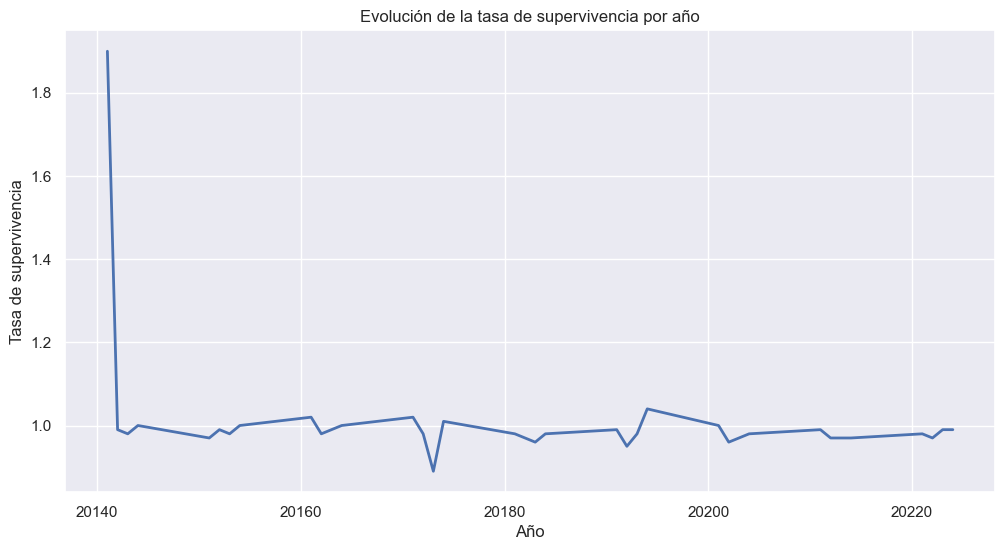

In [120]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Configuramos el estilo de Seaborn
sns.set(style="darkgrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=crecimiento100hogares, x=crecimiento100hogares.index, y='Crecimiento', linewidth=2, markers=False)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de supervivencia')
plt.title('Evolución de la tasa de supervivencia por año')
#plt.savefig(r'C:\Users\ingju\Desktop\proyect02\src\kpi4', dpi=50)
# Mostrar el gráfico
plt.show()

In [121]:
crecimiento100hogares.shape

(36, 5)

In [122]:
kpi

,Anio,Trimestre,AnioTrimestre,Provincia,AccesoCada100Hogares,DiferenciaTrimestral,PorcientoTrimestral,Cumple2,cumple_KPI,2_cumplido,2_cumplido_anterior,BandAnchaFija,Dial_up,ADSL,Cablemodem,FibraOptica,Wireless,OtrosTipoConexion,nuevoAcceso,Crecimiento
0,2022,4,20224,Buenos Aires,78.94,0.83,1.05,0,0,False,0,5,6.0,326,3,1,130,72,78.11,98.948569
1,2022,3,20223,Buenos Aires,78.11,0.53,0.68,0,0,False,False,5,6.0,340,3,1,127,70,77.58,99.321470
2,2022,2,20222,Buenos Aires,77.58,1.50,1.93,0,0,False,False,5,6.0,351,3,1,127,71,76.08,98.066512
3,2022,1,20221,Buenos Aires,76.08,0.42,0.55,0,0,False,False,5,6.0,392,3,1,126,67,75.66,99.447950
4,2021,4,20214,Buenos Aires,75.66,3.98,5.26,1,0,True,False,5,6.0,426,3,1,127,73,71.68,94.739625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2015,1,20151,Tucuman,35.08,-0.24,-0.68,0,0,False,False,138,92.0,138,115,116,88,100,35.32,100.684151
860,2014,4,20144,Tucuman,35.32,1.38,3.91,1,0,True,False,137,95.0,137,97,116,13,105,33.94,96.092865
861,2014,3,20143,Tucuman,33.94,0.00,0.00,0,0,False,True,132,88.0,132,97,117,13,100,33.94,100.000000
862,2014,2,20142,Tucuman,33.94,0.52,1.53,0,0,False,False,132,88.0,132,97,121,13,98,33.42,98.467885


## Segundo KPI.
 * Obteniendo los servicios que se han adquirido por provincia por cada 100 hogares.

In [123]:
# Agrupamos por Año y trimestre
serviciosOfrecidos =kpi.groupby(['AnioTrimestre']).agg({'Provincia': 'unique','BandAnchaFija': 'sum', 'Dial_up': 'sum','ADSL': 'sum','Cablemodem': 'sum','FibraOptica': 'sum', 'Wireless': 'sum', 'OtrosTipoConexion': 'sum'})
# Observamos los valores
serviciosOfrecidos['anioTrimestre']= serviciosOfrecidos.index
serviciosOfrecidos

,Provincia,BandAnchaFija,Dial_up,ADSL,Cablemodem,FibraOptica,Wireless,OtrosTipoConexion,anioTrimestre
AnioTrimestre,,,,,,,,,
20141,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2351,4227.0,2135,3035,6201,2023,3371,20141
20142,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2384,4185.0,2143,4249,6204,1248,3343,20142
20143,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2423,4215.0,2153,4333,5365,1082,3463,20143
20144,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2442,4695.0,2189,4325,5391,1257,2911,20144
20151,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2534,4396.0,2174,3095,5214,1060,2781,20151
20152,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2581,3703.0,2186,3548,5328,1165,3395,20152
20153,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2628,3634.0,2208,3142,4943,1330,3422,20153
20154,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2648,3428.0,2221,3177,5402,430,3139,20154
20161,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2621,3591.0,2211,3132,5756,1322,3266,20161


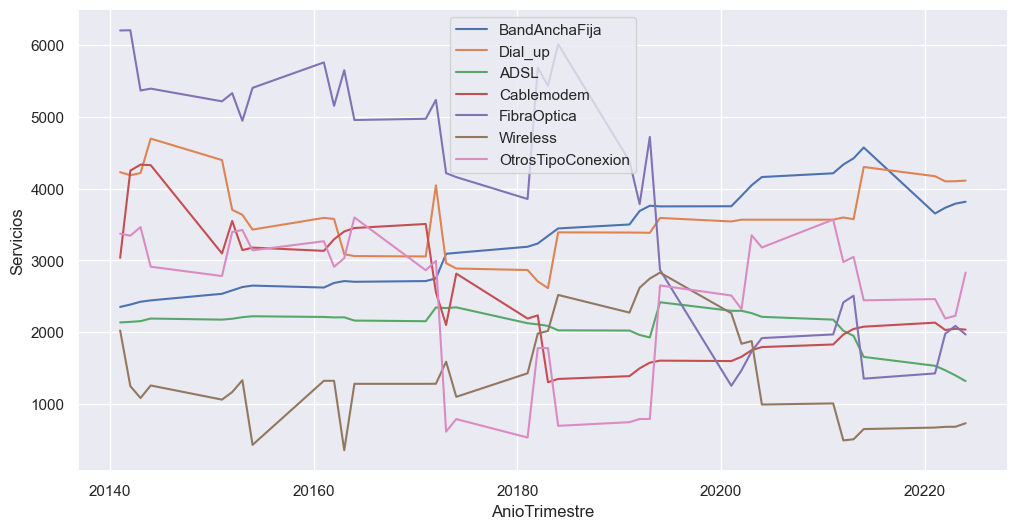

In [124]:

plt.figure(figsize=(12, 6))
# Configura el eje x y las columnas que deseas graficar
x = serviciosOfrecidos['anioTrimestre']
y1 = serviciosOfrecidos['BandAnchaFija']
y2 = serviciosOfrecidos['Dial_up']
y3 = serviciosOfrecidos['ADSL']
y4 = serviciosOfrecidos['Cablemodem']
y5 = serviciosOfrecidos['FibraOptica']
y6 = serviciosOfrecidos['Wireless']
y7 = serviciosOfrecidos['OtrosTipoConexion']

# Crea un gráfico de líneas
plt.plot(x, y1, label='BandAnchaFija')
plt.plot(x, y2, label='Dial_up')
plt.plot(x, y3, label='ADSL')
plt.plot(x, y4, label='Cablemodem')
plt.plot(x, y5, label='FibraOptica')
plt.plot(x, y6, label='Wireless')
plt.plot(x, y7, label='OtrosTipoConexion')

# Etiqueta el eje x
plt.xlabel('AnioTrimestre')

# Etiqueta el eje y
plt.ylabel('Servicios')

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()


In [125]:


# Selecciona las columnas en las que deseas encontrar el máximo
columnas_seleccionadas = ['BandAnchaFija'
                          ,'Dial_up'
                          ,'ADSL'
                          ,'Cablemodem'
                          ,'FibraOptica'
                          ,'Wireless'
                          ,'OtrosTipoConexion']

# Encuentra el máximo en cada fila de las columnas seleccionadas
serviciosOfrecidos['Mayor_Valor'] = serviciosOfrecidos[columnas_seleccionadas].max(axis=1)

# Encuentra el nombre de la columna con el máximo valor en cada fila
serviciosOfrecidos['ServicioMayorValor'] = serviciosOfrecidos[columnas_seleccionadas].idxmax(axis=1)

# Encuentra el menor en cada fila de las columnas seleccionadas
serviciosOfrecidos['Menor_Valor'] = serviciosOfrecidos[columnas_seleccionadas].min(axis=1)

# Encuentra el nombre de la columna con el menor valor en cada fila
serviciosOfrecidos['ServicioMenorValor'] = serviciosOfrecidos[columnas_seleccionadas].idxmin(axis=1)

# Muestra el DataFrame resultante
serviciosOfrecidos


,Provincia,BandAnchaFija,Dial_up,ADSL,Cablemodem,FibraOptica,Wireless,OtrosTipoConexion,anioTrimestre,Mayor_Valor,ServicioMayorValor,Menor_Valor,ServicioMenorValor
AnioTrimestre,,,,,,,,,,,,,
20141,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2351,4227.0,2135,3035,6201,2023,3371,20141,6201.0,FibraOptica,2023.0,Wireless
20142,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2384,4185.0,2143,4249,6204,1248,3343,20142,6204.0,FibraOptica,1248.0,Wireless
20143,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2423,4215.0,2153,4333,5365,1082,3463,20143,5365.0,FibraOptica,1082.0,Wireless
20144,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2442,4695.0,2189,4325,5391,1257,2911,20144,5391.0,FibraOptica,1257.0,Wireless
20151,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2534,4396.0,2174,3095,5214,1060,2781,20151,5214.0,FibraOptica,1060.0,Wireless
20152,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2581,3703.0,2186,3548,5328,1165,3395,20152,5328.0,FibraOptica,1165.0,Wireless
20153,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2628,3634.0,2208,3142,4943,1330,3422,20153,4943.0,FibraOptica,1330.0,Wireless
20154,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2648,3428.0,2221,3177,5402,430,3139,20154,5402.0,FibraOptica,430.0,Wireless
20161,"[Buenos Aires, Cordoba, Capital Federal, Catam...",2621,3591.0,2211,3132,5756,1322,3266,20161,5756.0,FibraOptica,1322.0,Wireless


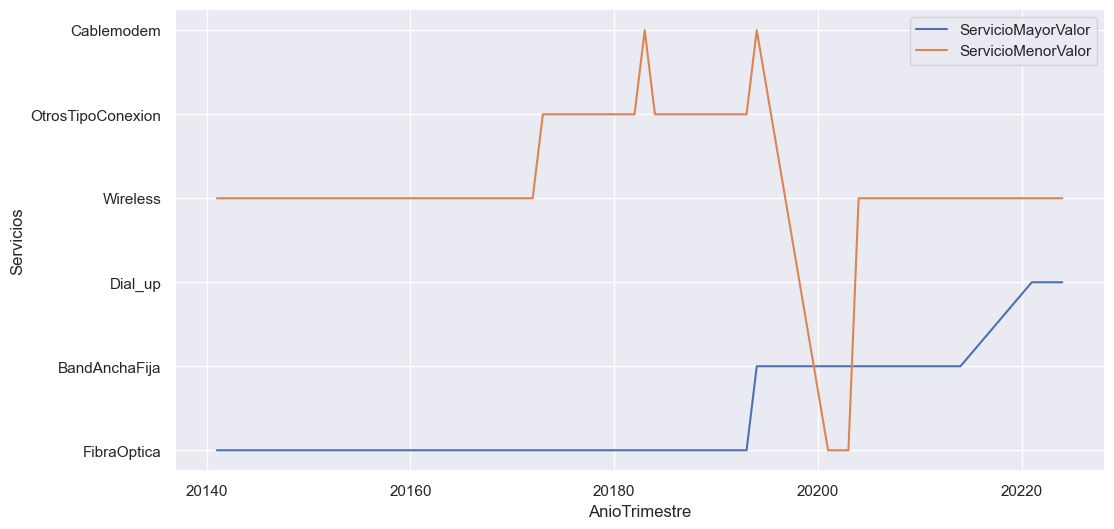

In [126]:
plt.figure(figsize=(12, 6))
# Configura el eje x y las columnas que deseas graficar
x = serviciosOfrecidos['anioTrimestre']
y1 = serviciosOfrecidos['ServicioMayorValor']
y2 = serviciosOfrecidos['ServicioMenorValor']


# Crea un gráfico de líneas
plt.plot(x, y1, label='ServicioMayorValor')
plt.plot(x, y2, label='ServicioMenorValor')


# Etiqueta el eje x
plt.xlabel('AnioTrimestre')

# Etiqueta el eje y
plt.ylabel('Servicios')

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

In [127]:
serviciosOfrecidos.shape

(36, 13)

In [128]:
%store kpi

Stored 'kpi' (DataFrame)


In [ ]:
kpi.to_csv()

In [129]:
%store crecimiento100hogares

Stored 'crecimiento100hogares' (DataFrame)


In [130]:
%store serviciosOfrecidos

Stored 'serviciosOfrecidos' (DataFrame)
